# Exercise 1: Overfitting and Underfiting Reduction for Deep Learning Models​

In [1]:
import tensorflow as tf
from tensorflow import keras
keras.__version__

'2.9.0'

## Dataset

Tập dữ liệu IMDB


*   Tập dữ liệu IMDB có 50 nghìn đánh giá phim có thể ứng dụng trong xử lý ngôn ngữ tự nhiên hoặc phân tích văn bản. 
*   Đây là tập dữ liệu để phân loại đánh giá nhị phân (tiêu cực và tích cực). 
*   IMDB cung cấp một bộ gồm 25.000 bài đánh giá phim có tính phân cực cao để đào tạo và 25.000 để thử nghiệm. 

In [2]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [3]:
from keras import models
from keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

In [4]:
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))


Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 7s 271us/step - loss: 0.4688 - acc: 0.8186 - val_loss: 0.3519 - val_acc: 0.8775
Epoch 2/20
25000/25000 [==============================] - 3s 104us/step - loss: 0.2725 - acc: 0.9052 - val_loss: 0.2881 - val_acc: 0.8896
Epoch 3/20
25000/25000 [==============================] - 3s 102us/step - loss: 0.2084 - acc: 0.9259 - val_loss: 0.2852 - val_acc: 0.8862
Epoch 4/20
25000/25000 [==============================] - 3s 101us/step - loss: 0.1732 - acc: 0.9383 - val_loss: 0.2886 - val_acc: 0.8860
Epoch 5/20
25000/25000 [==============================] - 2s 97us/step - loss: 0.1493 - acc: 0.9475 - val_loss: 0.3067 - val_acc: 0.8814
Epoch 6/20
25000/25000 [==============================] - 2s 99us/step - loss: 0.1314 - acc: 0.9552 - val_loss: 0.3299 - val_acc: 0.8774
Epoch 7/20
25000/25000 [==============================] - 3s 103us/step - loss: 0.1168 - acc: 0.9602 - val_loss: 0.3497 - v

## Fighting overfitting

### Reducing the network's size

Cách đơn giản nhất để ngăn chặn việc overfitting là giảm kích thước của mô hình, tức là số lượng các tham số có thể học được trong mô hình (được xác định bởi số lớp và số đơn vị trên mỗi lớp). Trong học sâu, số lượng các tham số có thể học được trong một mô hình thường được gọi là "khả năng" của mô hình. Một cách trực quan, một mô hình có nhiều tham số hơn sẽ có nhiều "khả năng ghi nhớ" hơn và do đó sẽ có thể dễ dàng học một ánh xạ hoàn hảo giống như từ điển giữa các mẫu huấn luyện và mục tiêu của chúng, một ánh xạ mà không có bất kỳ sức mạnh tổng quát hóa nào. Ví dụ, một mô hình với 500.000 tham số nhị phân có thể dễ dàng được thực hiện để học lớp của mọi chữ số trong tập huấn luyện MNIST: chúng ta chỉ cần 10 tham số nhị phân cho mỗi tham số trong 50.000 chữ số. Một mô hình như vậy sẽ vô dụng cho việc phân loại các mẫu chữ số mới. Luôn ghi nhớ điều này: các mô hình học sâu có xu hướng phù hợp tốt với dữ liệu đào tạo, nhưng thách thức thực sự là tổng quát hóa chứ không phải phù hợp.

Mặt khác, nếu mạng có tài nguyên ghi nhớ hạn chế, nó sẽ không thể học ánh xạ này một cách dễ dàng, và do đó, để giảm thiểu sự mất mát của nó, nó sẽ phải sử dụng đến việc học các biểu diễn nén có khả năng dự đoán liên quan đến mục tiêu - chính xác là loại biểu diễn mà chúng tôi quan tâm. Đồng thời, hãy nhớ rằng bạn nên sử dụng các mô hình có đủ thông số mà chúng sẽ không phù hợp: mô hình của bạn không nên bỏ đói các tài nguyên ghi nhớ . Có một sự thỏa hiệp được tìm thấy giữa "quá nhiều công suất" và "không đủ năng lực".

Thật không may, không có công thức kỳ diệu nào để xác định số lượng lớp phù hợp hoặc kích thước phù hợp cho mỗi lớp là bao nhiêu. Bạn sẽ phải đánh giá một loạt các kiến ​​trúc khác nhau (tất nhiên là trên bộ xác thực của bạn, không phải trên bộ thử nghiệm của bạn) để tìm ra kích thước mô hình phù hợp cho dữ liệu của bạn. Quy trình chung để tìm kích thước mô hình thích hợp là bắt đầu với tương đối ít lớp và tham số, đồng thời bắt đầu tăng kích thước của các lớp hoặc thêm các lớp mới cho đến khi bạn thấy lợi nhuận giảm dần liên quan đến việc mất xác thực.

Hãy thử điều này trên mạng phân loại đánh giá phim của chúng tôi. Mạng ban đầu của chúng tôi là như vậy:

Bây giờ chúng ta hãy thử thay thế nó bằng mạng nhỏ hơn này:

In [5]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

Dưới đây là so sánh các validation losses của mạng gốc và mạng nhỏ hơn. Các dấu chấm là các giá trị mất xác thực của mạng nhỏ hơn và các dấu chéo là mạng ban đầu (hãy nhớ: mất xác nhận thấp hơn báo hiệu một mô hình tốt hơn).

In [6]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 110us/step - loss: 0.5209 - acc: 0.8175 - val_loss: 0.4296 - val_acc: 0.8669
Epoch 2/20
25000/25000 [==============================] - 3s 102us/step - loss: 0.3463 - acc: 0.8936 - val_loss: 0.3380 - val_acc: 0.8831
Epoch 3/20
25000/25000 [==============================] - 3s 102us/step - loss: 0.2650 - acc: 0.9129 - val_loss: 0.3004 - val_acc: 0.8881
Epoch 4/20
25000/25000 [==============================] - 3s 101us/step - loss: 0.2186 - acc: 0.9267 - val_loss: 0.2822 - val_acc: 0.8900
Epoch 5/20
25000/25000 [==============================] - 3s 101us/step - loss: 0.1894 - acc: 0.9370 - val_loss: 0.2814 - val_acc: 0.8881
Epoch 6/20
25000/25000 [==============================] - 3s 100us/step - loss: 0.1680 - acc: 0.9441 - val_loss: 0.2835 - val_acc: 0.8888
Epoch 7/20
25000/25000 [==============================] - 3s 101us/step - loss: 0.1519 - acc: 0.9489 - val_loss: 0.2923 - 

In [7]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

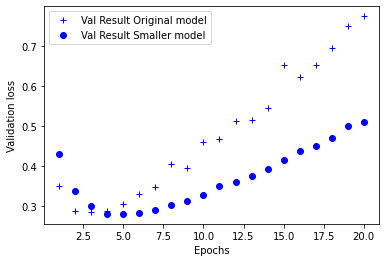

In [9]:
import matplotlib.pyplot as plt

# b+ is for "blue cross"
plt.plot(epochs, original_val_loss, 'b+', label='Val Result Original model')
# "bo" is for "blue dot"
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Val Result Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

Như bạn có thể thấy, mạng nhỏ hơn bắt đầu gặp overfiting muộn hơn mạng tham chiếu (sau 6 epochs thay vì 4 epochs) và performance của nó giảm chậm hơn nhiều khi nó bắt đầu bị overfiting.

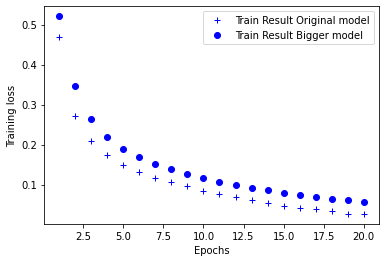

In [10]:
original_train_loss = original_hist.history['loss']
small_model_train_loss = smaller_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Train Result Original model')
plt.plot(epochs, small_model_train_loss, 'bo', label='Train Result Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

Bây giờ, để bắt đầu, hãy thêm vào điểm chuẩn này một mạng có dung lượng lớn hơn nhiều so với vấn đề sẽ đảm bảo:

In [11]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(512, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

In [12]:
bigger_model_hist = bigger_model.fit(x_train, y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 4s 156us/step - loss: 0.4603 - acc: 0.7865 - val_loss: 0.3931 - val_acc: 0.8205
Epoch 2/20
25000/25000 [==============================] - 3s 137us/step - loss: 0.2201 - acc: 0.9136 - val_loss: 0.2977 - val_acc: 0.8781
Epoch 3/20
25000/25000 [==============================] - 3s 129us/step - loss: 0.1384 - acc: 0.9492 - val_loss: 0.3219 - val_acc: 0.8858
Epoch 4/20
25000/25000 [==============================] - 3s 128us/step - loss: 0.0656 - acc: 0.9816 - val_loss: 0.4180 - val_acc: 0.8812
Epoch 5/20
25000/25000 [==============================] - 3s 127us/step - loss: 0.0709 - acc: 0.9868 - val_loss: 0.4796 - val_acc: 0.8783
Epoch 6/20
25000/25000 [==============================] - 3s 127us/step - loss: 0.0793 - acc: 0.9868 - val_loss: 0.4821 - val_acc: 0.8771
Epoch 7/20
25000/25000 [==============================] - 3s 130us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.6312 - 

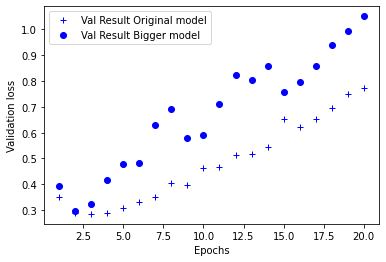

In [13]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Val Result Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Val Result Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

Mạng lớn hơn bắt đầu bị overfiting và gần như ngay lập tức, chỉ sau một epoch và overfiting nghiêm trọng hơn nhiều. Và validation loss cũng nhiễu hơn.

Trong khi đó, đây là training losse cho hai mô hình của chúng ta:

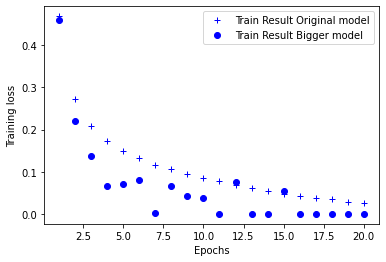

In [14]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Train Result Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Train Result Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

Như bạn có thể thấy, mạng lớn hơn có training loss gần bằng 0 rất nhanh chóng. Mạng càng có nhiều dung lượng, nó sẽ có thể mô hình hóa dữ liệu đào tạo càng nhanh (dẫn đến training loss thấp), nhưng nó càng dễ bị overfiting (dẫn đến chênh lệch lớn giữa việc đào tạo và validation loss).

### Adding weight regularization

Một "mô hình đơn giản" trong ngữ cảnh này là một mô hình mà sự phân bố của các giá trị tham số có ít entropy hơn (hoặc một mô hình có ít tham số hơn hoàn toàn, như chúng ta đã thấy trong phần trên). Do đó, một cách phổ biến để giảm thiểu việc trang bị quá mức là đặt các hạn chế về độ phức tạp của mạng bằng cách buộc các trọng số của nó chỉ nhận các giá trị nhỏ, điều này làm cho việc phân phối các giá trị trọng số trở nên "đều đặn" hơn. Điều này được gọi là "điều chỉnh trọng lượng", và nó được thực hiện bằng cách thêm vào chức năng tổn thất của mạng một chi phí liên quan đến việc có các trọng số lớn. Chi phí này có hai loại:



*   Chính quy hóa L1, trong đó chi phí tăng thêm tỷ lệ với giá trị tuyệt đối của các hệ số trọng số (tức là cái được gọi là "định mức L1" của các trọng số).
*   Chính quy hóa L2, trong đó chi phí tăng thêm tỷ lệ với bình phương giá trị của các hệ số trọng số (tức là cái được gọi là "định mức L2" của các trọng số). Sự chính quy hóa L2 còn được gọi là sự phân rã trọng lượng trong ngữ cảnh của mạng nơ-ron. Đừng để cái tên khác khiến bạn nhầm lẫn: sự phân rã trọng lượng về mặt toán học giống hệt như sự chính quy hóa L2.


Trong Keras, điều chỉnh trọng số được thêm vào bằng cách chuyển các thể hiện của bộ điều chỉnh trọng số cho các lớp dưới dạng đối số từ khóa. Hãy thêm quy định trọng lượng L2 vào mạng phân loại đánh giá phim của chúng tôi:

In [15]:
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [16]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

l2 (0,001) có nghĩa là mọi hệ số trong ma trận trọng số của lớp sẽ thêm 0,001 * hệ số trọng lượng_giá trị vào tổng tổn thất của mạng. Lưu ý rằng vì hình phạt này chỉ được bổ sung vào thời điểm đào tạo, tổn thất cho mạng này khi đào tạo sẽ cao hơn nhiều so với thời điểm kiểm tra.

Đây là tác động của hình phạt chính quy L2:

In [17]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 122us/step - loss: 0.4697 - acc: 0.8358 - val_loss: 0.3840 - val_acc: 0.8698
Epoch 2/20
25000/25000 [==============================] - 3s 106us/step - loss: 0.3059 - acc: 0.9055 - val_loss: 0.3442 - val_acc: 0.8823
Epoch 3/20
25000/25000 [==============================] - 3s 111us/step - loss: 0.2690 - acc: 0.9206 - val_loss: 0.3370 - val_acc: 0.8831
Epoch 4/20
25000/25000 [==============================] - 3s 106us/step - loss: 0.2470 - acc: 0.9292 - val_loss: 0.3347 - val_acc: 0.88760s - loss: 0.2459 - acc: 0.92
Epoch 5/20
25000/25000 [==============================] - 3s 115us/step - loss: 0.2375 - acc: 0.9330 - val_loss: 0.3424 - val_acc: 0.8834
Epoch 6/20
25000/25000 [==============================] - 3s 121us/step - loss: 0.2257 - acc: 0.9382 - val_loss: 0.3555 - val_acc: 0.8794
Epoch 7/20
25000/25000 [==============================] - 3s 116us/step - loss: 0.2210 - acc:

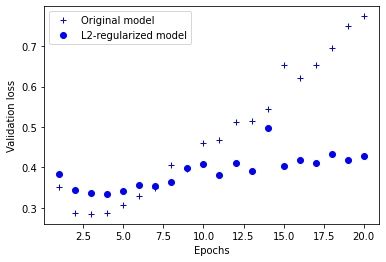

In [18]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

Như bạn có thể thấy, mô hình với sự điều hòa L2 (dấu chấm) đã trở nên chống lại việc trang bị quá nhiều hơn so với mô hình tham chiếu (chữ thập), mặc dù cả hai mô hình đều có cùng số lượng tham số.

Là các lựa chọn thay thế cho quá trình điều chỉnh L2, bạn có thể sử dụng một trong các bộ điều chỉnh trọng lượng Keras sau:

In [19]:
from keras import regularizers

# L1 regularization
regularizers.l1(0.001)

# L1 and L2 regularization at the same time
regularizers.l1_l2(l1=0.001, l2=0.001)

### Adding dropout

Bỏ học là một trong những kỹ thuật chính quy hóa hiệu quả nhất và được sử dụng phổ biến nhất cho mạng nơ-ron, được phát triển bởi Hinton và các sinh viên của ông tại Đại học Toronto. Bỏ học, áp dụng cho một lớp, bao gồm "bỏ học" ngẫu nhiên (tức là đặt thành 0) một số tính năng đầu ra của lớp trong quá trình đào tạo. Giả sử một lớp nhất định thông thường sẽ trả về một vectơ [0,2, 0,5, 1,3, 0,8, 1,1] cho một mẫu đầu vào nhất định trong quá trình đào tạo; sau khi áp dụng tính năng bỏ qua, vectơ này sẽ có một vài mục không phân phối ngẫu nhiên, ví dụ: [0, 0,5, 1,3, 0, 1,1]. "Tỷ lệ bỏ học" là phần nhỏ của các đối tượng địa lý đang bị loại bỏ; nó thường được đặt trong khoảng từ 0,2 đến 0,5. Tại thời điểm kiểm tra, không có đơn vị nào bị bỏ đi, và thay vào đó, giá trị đầu ra của lớp được thu nhỏ theo hệ số bằng với tỷ lệ bỏ học, để cân bằng thực tế là nhiều đơn vị đang hoạt động hơn so với thời điểm đào tạo.

Kỹ thuật này có vẻ kỳ lạ và tùy tiện. Tại sao điều này sẽ giúp giảm việc mặc quá nhiều? Geoff Hinton đã nói rằng anh ấy được truyền cảm hứng, cùng với những điều khác, bởi một cơ chế ngăn chặn gian lận được các ngân hàng sử dụng - theo cách nói của riêng anh ấy: "Tôi đã đến ngân hàng của mình. Các giao dịch viên liên tục thay đổi và tôi hỏi một trong số họ tại sao. Anh ấy nói rằng anh ấy không biết nhưng họ đã di chuyển xung quanh rất nhiều. Tôi nghĩ rằng đó phải là vì nó cần sự hợp tác giữa các nhân viên để lừa đảo ngân hàng thành công. Điều này khiến tôi nhận ra rằng việc loại bỏ ngẫu nhiên một tập hợp con tế bào thần kinh khác nhau trên mỗi ví dụ sẽ ngăn chặn âm mưu và do đó giảm trang phục quá mức ”.

Ý tưởng cốt lõi là việc đưa nhiễu vào các giá trị đầu ra của một lớp có thể phá vỡ các mẫu ngẫu nhiên không đáng kể (những gì Hinton gọi là "âm mưu"), mà mạng sẽ bắt đầu ghi nhớ nếu không có nhiễu.

Trong Keras, bạn có thể giới thiệu tính năng bỏ qua trong mạng thông qua lớp Bỏ qua, lớp này được áp dụng cho đầu ra của lớp ngay trước nó, ví dụ:



```
model.add(layers.Dropout(0.5))
```

Hãy thêm hai lớp Dropout trong mạng IMDB của chúng tôi để xem chúng hoạt động như thế nào trong việc giảm trang bị quá mức:


In [20]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [21]:
dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 126us/step - loss: 0.6084 - acc: 0.6724 - val_loss: 0.4867 - val_acc: 0.8535
Epoch 2/20
25000/25000 [==============================] - 3s 109us/step - loss: 0.4530 - acc: 0.8089 - val_loss: 0.3485 - val_acc: 0.8792
Epoch 3/20
25000/25000 [==============================] - 3s 113us/step - loss: 0.3613 - acc: 0.8604 - val_loss: 0.2937 - val_acc: 0.8859
Epoch 4/20
25000/25000 [==============================] - 3s 106us/step - loss: 0.3057 - acc: 0.8863 - val_loss: 0.2782 - val_acc: 0.8902
Epoch 5/20
25000/25000 [==============================] - 3s 114us/step - loss: 0.2644 - acc: 0.9057 - val_loss: 0.2827 - val_acc: 0.8871
Epoch 6/20
25000/25000 [==============================] - 3s 108us/step - loss: 0.2363 - acc: 0.9156 - val_loss: 0.2906 - val_acc: 0.8879
Epoch 7/20
25000/25000 [==============================] - 3s 111us/step - loss: 0.2166 - acc: 0.9250 - val_loss: 0.2936 - 

Hãy vẽ biểu đồ kết quả:

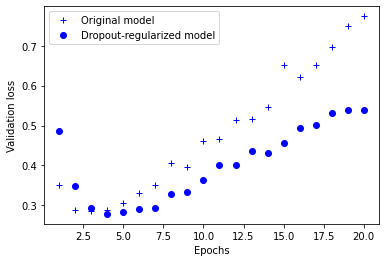

In [22]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

Một lần nữa, một cải tiến rõ ràng so với mạng tham chiếu.

Tổng kết: đây là những cách phổ biến nhất để ngăn chặn việc trang bị quá mức trong mạng thần kinh:


*   Nhận thêm dữ liệu đào tạo.
*   Giảm dung lượng của mạng.
*   Thêm quy định trọng lượng.
*   Thêm học sinh bỏ học.

## K-Fold Cross Validation

K-Fold CV sẽ giúp chúng ta đánh giá một model đầy đủ và chính xác hơn

In [24]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from sklearn.model_selection import KFold
import numpy as np

In [25]:
def get_model():

    original_model = models.Sequential()
    original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
    original_model.add(layers.Dense(16, activation='relu'))
    original_model.add(layers.Dense(1, activation='sigmoid'))

    original_model.compile(optimizer='rmsprop',
                        loss='binary_crossentropy',
                        metrics=['acc'])

    return original_model

In [26]:
# Định nghĩa K-Fold CV
num_folds = 5

kfold = KFold(n_splits=num_folds, shuffle=True)

accuracy_list = []
loss_list = []

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


c:\Users\Msi\anaconda3\envs\Tank\lib\site-packages\keras\datasets\imdb.py:101: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
c:\Users\Msi\anaconda3\envs\Tank\lib\site-packages\keras\datasets\imdb.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [27]:
X = np.concatenate((train_data, test_data))
y = np.concatenate((train_labels, test_labels))

In [28]:
# K-fold Cross Validation model evaluation
fold_idx = 1

for train_ids, val_ids in kfold.split(X, y):
    model = get_model()

    print("Start train Fold ", fold_idx)

    # Our vectorized training data
    x_train = vectorize_sequences(X[train_ids])
    # Our vectorized test data
    x_test = vectorize_sequences(X[val_ids])
    # Our vectorized labels
    y_train = np.asarray(y[train_ids]).astype('float32')
    y_test = np.asarray(y[val_ids]).astype('float32')    

    # Train model
    model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_test, y_test))

    # Test and output result
    scores = model.evaluate(x_test, y_test, verbose=0)
    print("Finish train Fold ", fold_idx)

    # Add information of accuracy and loss to list
    accuracy_list.append(scores[1] * 100)
    loss_list.append(scores[0])

    # Next Fold
    fold_idx = fold_idx + 1

Start train Fold  1
Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 4s 94us/step - loss: 0.4016 - acc: 0.8410 - val_loss: 0.2957 - val_acc: 0.8891s - loss
Epoch 2/20
40000/40000 [==============================] - 3s 78us/step - loss: 0.2381 - acc: 0.9125 - val_loss: 0.2642 - val_acc: 0.8949
Epoch 3/20
40000/40000 [==============================] - 3s 76us/step - loss: 0.1998 - acc: 0.9253 - val_loss: 0.2885 - val_acc: 0.8840
Epoch 4/20
40000/40000 [==============================] - 3s 74us/step - loss: 0.1774 - acc: 0.9341 - val_loss: 0.3073 - val_acc: 0.8778
Epoch 5/20
40000/40000 [==============================] - 4s 96us/step - loss: 0.1608 - acc: 0.9405 - val_loss: 0.3154 - val_acc: 0.8844
Epoch 6/20
40000/40000 [==============================] - 6s 146us/step - loss: 0.1469 - acc: 0.9455 - val_loss: 0.3026 - val_acc: 0.8881
Epoch 7/20
40000/40000 [==============================] - 5s 115us/step - loss: 0.1339 - acc: 0.951

In [29]:
# In kết quả tổng thể
print('* Chi tiết các fold')
for i in range(0, len(accuracy_list)):
  print(f'> Fold {i+1} - Loss: {loss_list[i]} - Accuracy: {accuracy_list[i]}%')

print('* Đánh giá tổng thể các folds:')
print(f'> Accuracy: {np.mean(accuracy_list)} (Độ lệch +- {np.std(accuracy_list)})')
print(f'> Loss: {np.mean(loss_list)}')

* Chi tiết các fold
> Fold 1 - Loss: 0.679884140381217 - Accuracy: 87.12%
> Fold 2 - Loss: 0.6066416468441487 - Accuracy: 87.03%
> Fold 3 - Loss: 0.5962332228660584 - Accuracy: 87.15%
> Fold 4 - Loss: 0.6829364640802145 - Accuracy: 87.17%
> Fold 5 - Loss: 0.6933303745031357 - Accuracy: 87.06%
* Đánh giá tổng thể các folds:
> Accuracy: 87.10600000000001 (Độ lệch +- 0.05314132102234657)
> Loss: 0.6518051697349548
